# Agregación de datos por categoría

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style 
import random
style.use("ggplot")

In [2]:
gender=["Male","Female"]
income=["Poor","Middle Class","Rich"]

In [3]:
n=500
gender_data=[]
income_data=[]

for i in range(500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [4]:
gender_data[:10], income_data[:10]

(['Male',
  'Male',
  'Male',
  'Male',
  'Female',
  'Male',
  'Female',
  'Male',
  'Male',
  'Female'],
 ['Middle Class',
  'Middle Class',
  'Poor',
  'Poor',
  'Poor',
  'Rich',
  'Middle Class',
  'Middle Class',
  'Middle Class',
  'Middle Class'])

In [5]:
# x ->N(0,1)
#N(m,s)-> m+s*z
height=160+30*np.random.randn(n)
weight=65+25*np.random.randn(n)
age=30+np.ceil(12*np.random.randn(n))
income=18000+np.ceil(3500*np.random.randn(n))

In [6]:
data=pd.DataFrame({
    "Gender":gender_data,
    "Economic Status": income_data,
    "Height":height,
    "Weight":weight,
    "Age":age,
    "Income":income
})

In [7]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Middle Class,166.568771,59.682633,21.0,19151.0
1,Male,Middle Class,157.093282,66.599187,47.0,21485.0
2,Male,Poor,192.274262,112.148665,55.0,16984.0
3,Male,Poor,132.239170,26.717110,51.0,14985.0
4,Female,Poor,174.111802,39.082971,17.0,12872.0


# Agrupación de datos

In [8]:
grouped_gender = data.groupby("Gender")

In [9]:
grouped_gender.groups #Índice

{'Female': Int64Index([  4,   6,   9,  11,  12,  13,  14,  19,  20,  21,
             ...
             471, 476, 477, 479, 486, 487, 489, 492, 495, 499],
            dtype='int64', length=260),
 'Male': Int64Index([  0,   1,   2,   3,   5,   7,   8,  10,  15,  16,
             ...
             484, 485, 488, 490, 491, 493, 494, 496, 497, 498],
            dtype='int64', length=240)}

In [10]:
grouped_gender.count()

,Economic Status,Height,Weight,Age,Income
Gender,,,,,
Female,260,260,260,260,260
Male,240,240,240,240,240


In [11]:
grouped_gender.get_group("Male").head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Middle Class,166.568771,59.682633,21.0,19151.0
1,Male,Middle Class,157.093282,66.599187,47.0,21485.0
2,Male,Poor,192.274262,112.148665,55.0,16984.0
3,Male,Poor,132.239170,26.717110,51.0,14985.0
5,Male,Rich,137.287195,89.798095,37.0,19083.0


In [12]:
grouped_gender.corr()

Height    Weight       Age    Income
Gender                                               
Female Height  1.000000  0.066457  0.006303  0.003511
       Weight  0.066457  1.000000  0.010379  0.035458
       Age     0.006303  0.010379  1.000000 -0.101782
       Income  0.003511  0.035458 -0.101782  1.000000
Male   Height  1.000000  0.066504  0.004760 -0.018854
       Weight  0.066504  1.000000  0.076326  0.120520
       Age     0.004760  0.076326  1.000000 -0.053654
       Income -0.018854  0.120520 -0.053654  1.000000

In [13]:
grouped_gender.dtypes

,Economic Status,Height,Weight,Age,Income
Gender,,,,,
Female,object,float64,float64,float64,float64
Male,object,float64,float64,float64,float64


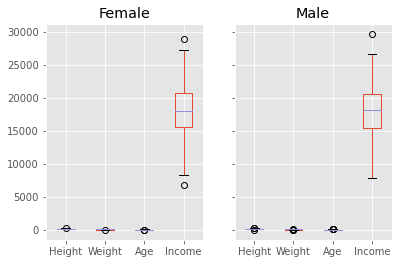

In [14]:
grouped_gender.boxplot()
plt.show()

In [15]:
for names,groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height      Weight   Age   Income
4    Female            Poor  174.111802   39.082971  17.0  12872.0
6    Female    Middle Class  157.232130   87.632988  52.0  23325.0
9    Female    Middle Class  145.163288   41.633614  11.0  17516.0
11   Female            Rich  173.843861   52.299520  33.0  25599.0
12   Female    Middle Class  123.948656   93.181034  35.0  17836.0
..      ...             ...         ...         ...   ...      ...
487  Female            Poor  139.152756   33.485653  36.0  15621.0
489  Female            Rich  174.354514  103.762423  20.0  19376.0
492  Female    Middle Class  172.867002   29.695595  30.0  21554.0
495  Female            Rich  175.406730   48.219868  25.0  21661.0
499  Female            Rich  148.506677   82.582140  45.0  16140.0

[260 rows x 6 columns]
Male
    Gender Economic Status      Height      Weight   Age   Income
0     Male    Middle Class  166.568771   59.682633  21.0  19151.0
1     Male    Middle Class  

In [16]:
double_group = data.groupby(["Gender","Economic Status"])

In [17]:
double_group.describe()

Height                                                 \
                        count        mean        std         min         25%   
Gender Economic Status                                                         
Female Middle Class      91.0  155.648103  25.979806   85.640011  140.639868   
       Poor              85.0  160.157322  29.241821  104.495879  137.894070   
       Rich              84.0  157.977488  30.732812   89.042134  140.653987   
Male   Middle Class      71.0  166.036862  32.857858   50.687540  147.980586   
       Poor              81.0  156.541091  28.891728   97.463172  133.822894   
       Rich              88.0  166.254658  29.714301  111.988011  145.031968   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     155.568381  171.875549  211.070976   91.0  64.120497   
       Poor             163.454007  177.522072  224.282255   85.0  63.790607   
       Rich             157.984245  177.351692  243.720420   84.0  59.637200   
Male   Middle Class     165.593785  184.436992  254.159770   71.0  68.141440   
       Poor             155.155367  178.080436  224.244469   81.0  64.780755   
       Rich             165.834106  187.483377  233.305945   88.0  65.754958   

                        ...    Age       Income                             \
                        ...    75%   max  count          mean          std   
Gender Economic Status  ...                                                  
Female Middle Class     ...  41.00  53.0   91.0  18344.142857  3795.665427   
       Poor             ...  38.00  64.0   85.0  17565.105882  3722.960100   
       Rich             ...  39.25  56.0   84.0  18256.535714  3609.951545   
Male   Middle Class     ...  41.50  70.0   71.0  18303.647887  3648.624450   
       Poor             ...  38.00  60.0   81.0  17724.691358  3590.880375   
       Rich             ...  37.00  65.0   88.0  18208.965909  3635.880811   

                                                                       
                            min       25%      50%       75%      max  
Gender Economic Status                                                 
Female Middle Class      8323.0  16345.50  17760.0  21145.50  28987.0  
       Poor              6743.0  14601.00  18119.0  20152.00  25805.0  
       Rich             10440.0  15642.75  18361.0  20879.25  27225.0  
Male   Middle Class      8462.0  15743.50  18907.0  20551.50  24194.0  
       Poor              9412.0  14764.00  17786.0  20634.00  25262.0  
       Rich              7865.0  15735.25  18138.0  20370.25  29758.0  

[6 rows x 32 columns]

In [18]:
len(double_group)

6

In [19]:
double_group.groups

{('Female',
  'Middle Class'): Int64Index([  6,   9,  12,  13,  14,  20,  21,  25,  28,  29,  41,  58,  60,
              69,  75,  78,  83,  85,  93, 100, 102, 106, 108, 113, 122, 124,
             153, 167, 173, 175, 184, 185, 199, 202, 207, 224, 233, 235, 240,
             247, 266, 267, 272, 277, 287, 291, 304, 312, 322, 328, 333, 339,
             358, 361, 362, 363, 364, 368, 370, 371, 375, 378, 384, 385, 389,
             394, 395, 396, 403, 407, 413, 415, 430, 432, 433, 434, 435, 437,
             438, 447, 449, 457, 460, 461, 463, 464, 469, 477, 479, 486, 492],
            dtype='int64'),
 ('Female',
  'Poor'): Int64Index([  4,  19,  24,  32,  38,  46,  55,  56,  57,  68,  71,  77,  79,
              80,  86,  88,  91, 104, 111, 129, 136, 138, 139, 142, 147, 151,
             164, 168, 169, 171, 174, 176, 178, 183, 186, 190, 195, 203, 209,
             213, 216, 217, 221, 226, 230, 236, 239, 242, 248, 262, 269, 282,
             289, 296, 297, 300, 302, 305, 308, 309, 319, 321

In [20]:
double_group.groups["Female","Poor"]

Int64Index([  4,  19,  24,  32,  38,  46,  55,  56,  57,  68,  71,  77,  79,
             80,  86,  88,  91, 104, 111, 129, 136, 138, 139, 142, 147, 151,
            164, 168, 169, 171, 174, 176, 178, 183, 186, 190, 195, 203, 209,
            213, 216, 217, 221, 226, 230, 236, 239, 242, 248, 262, 269, 282,
            289, 296, 297, 300, 302, 305, 308, 309, 319, 321, 323, 332, 343,
            344, 348, 353, 355, 356, 372, 373, 400, 405, 410, 418, 420, 425,
            431, 436, 440, 442, 462, 471, 487],
           dtype='int64')

In [21]:
double_group.get_group(("Female","Poor")).head()

,Gender,Economic Status,Height,Weight,Age,Income
4,Female,Poor,174.111802,39.082971,17.0,12872.0
19,Female,Poor,190.207326,83.715221,2.0,16206.0
24,Female,Poor,133.063285,57.892953,33.0,20470.0
32,Female,Poor,117.356497,45.884438,45.0,11496.0
38,Female,Poor,201.273052,45.356449,16.0,14724.0


# Operaciones sobre datos agrupados

In [22]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     155.648103  64.120497  30.505495  18344.142857
       Poor             160.157322  63.790607  30.635294  17565.105882
       Rich             157.977488  59.637200  29.440476  18256.535714
Male   Middle Class     166.036862  68.141440  32.563380  18303.647887
       Poor             156.541091  64.780755  29.074074  17724.691358
       Rich             166.254658  65.754958  31.306818  18208.965909

In [23]:
double_group.sum()

Height       Weight     Age     Income
Gender Economic Status                                              
Female Middle Class     14163.977335  5834.965218  2776.0  1669317.0
       Poor             13613.372408  5422.201636  2604.0  1493034.0
       Rich             13270.109017  5009.524761  2473.0  1533549.0
Male   Middle Class     11788.617187  4838.042225  2312.0  1299559.0
       Poor             12679.828395  5247.241132  2355.0  1435700.0
       Rich             14630.409940  5786.436277  2755.0  1602389.0

In [24]:
double_group.count()

Height  Weight  Age  Income
Gender Economic Status                             
Female Middle Class         91      91   91      91
       Poor                 85      85   85      85
       Rich                 84      84   84      84
Male   Middle Class         71      71   71      71
       Poor                 81      81   81      81
       Rich                 88      88   88      88

In [25]:
double_group.size()

Gender  Economic Status
Female  Middle Class       91
        Poor               85
        Rich               84
Male    Middle Class       71
        Poor               81
        Rich               88
dtype: int64

In [26]:
double_group.describe()

Height                                                 \
                        count        mean        std         min         25%   
Gender Economic Status                                                         
Female Middle Class      91.0  155.648103  25.979806   85.640011  140.639868   
       Poor              85.0  160.157322  29.241821  104.495879  137.894070   
       Rich              84.0  157.977488  30.732812   89.042134  140.653987   
Male   Middle Class      71.0  166.036862  32.857858   50.687540  147.980586   
       Poor              81.0  156.541091  28.891728   97.463172  133.822894   
       Rich              88.0  166.254658  29.714301  111.988011  145.031968   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     155.568381  171.875549  211.070976   91.0  64.120497   
       Poor             163.454007  177.522072  224.282255   85.0  63.790607   
       Rich             157.984245  177.351692  243.720420   84.0  59.637200   
Male   Middle Class     165.593785  184.436992  254.159770   71.0  68.141440   
       Poor             155.155367  178.080436  224.244469   81.0  64.780755   
       Rich             165.834106  187.483377  233.305945   88.0  65.754958   

                        ...    Age       Income                             \
                        ...    75%   max  count          mean          std   
Gender Economic Status  ...                                                  
Female Middle Class     ...  41.00  53.0   91.0  18344.142857  3795.665427   
       Poor             ...  38.00  64.0   85.0  17565.105882  3722.960100   
       Rich             ...  39.25  56.0   84.0  18256.535714  3609.951545   
Male   Middle Class     ...  41.50  70.0   71.0  18303.647887  3648.624450   
       Poor             ...  38.00  60.0   81.0  17724.691358  3590.880375   
       Rich             ...  37.00  65.0   88.0  18208.965909  3635.880811   

                                                                       
                            min       25%      50%       75%      max  
Gender Economic Status                                                 
Female Middle Class      8323.0  16345.50  17760.0  21145.50  28987.0  
       Poor              6743.0  14601.00  18119.0  20152.00  25805.0  
       Rich             10440.0  15642.75  18361.0  20879.25  27225.0  
Male   Middle Class      8462.0  15743.50  18907.0  20551.50  24194.0  
       Poor              9412.0  14764.00  17786.0  20634.00  25262.0  
       Rich              7865.0  15735.25  18138.0  20370.25  29758.0  

[6 rows x 32 columns]

In [27]:
gincome=double_group["Income"]
gincome.describe()

count          mean          std      min       25%  \
Gender Economic Status                                                        
Female Middle Class      91.0  18344.142857  3795.665427   8323.0  16345.50   
       Poor              85.0  17565.105882  3722.960100   6743.0  14601.00   
       Rich              84.0  18256.535714  3609.951545  10440.0  15642.75   
Male   Middle Class      71.0  18303.647887  3648.624450   8462.0  15743.50   
       Poor              81.0  17724.691358  3590.880375   9412.0  14764.00   
       Rich              88.0  18208.965909  3635.880811   7865.0  15735.25   

                            50%       75%      max  
Gender Economic Status                              
Female Middle Class     17760.0  21145.50  28987.0  
       Poor             18119.0  20152.00  25805.0  
       Rich             18361.0  20879.25  27225.0  
Male   Middle Class     18907.0  20551.50  24194.0  
       Poor             17786.0  20634.00  25262.0  
       Rich             18138.0  20370.25  29758.0

#### Utilizar función aggregate

In [28]:
# Operaciones por columna
double_group.aggregate({
  "Income": np.sum,
    "Age":np.mean,
    "Height":np.std
})

Income        Age     Height
Gender Economic Status                                 
Female Middle Class     1669317.0  30.505495  25.979806
       Poor             1493034.0  30.635294  29.241821
       Rich             1533549.0  29.440476  30.732812
Male   Middle Class     1299559.0  32.563380  32.857858
       Poor             1435700.0  29.074074  28.891728
       Rich             1602389.0  31.306818  29.714301

In [29]:
# Varias operaciones
double_group.aggregate({
    "sum","mean","std","var"
})

Height                                       \
                                var           sum        mean        std   
Gender Economic Status                                                     
Female Middle Class      674.950310  14163.977335  155.648103  25.979806   
       Poor              855.084080  13613.372408  160.157322  29.241821   
       Rich              944.505715  13270.109017  157.977488  30.732812   
Male   Middle Class     1079.638858  11788.617187  166.036862  32.857858   
       Poor              834.731939  12679.828395  156.541091  28.891728   
       Rich              882.939660  14630.409940  166.254658  29.714301   

                            Weight                                     \
                               var          sum       mean        std   
Gender Economic Status                                                  
Female Middle Class     651.257870  5834.965218  64.120497  25.519755   
       Poor             596.127027  5422.201636  63.790607  24.415713   
       Rich             655.914222  5009.524761  59.637200  25.610822   
Male   Middle Class     627.073915  4838.042225  68.141440  25.041444   
       Poor             607.792267  5247.241132  64.780755  24.653443   
       Rich             561.152269  5786.436277  65.754958  23.688653   

                               Age                                \
                               var     sum       mean        std   
Gender Economic Status                                             
Female Middle Class     150.808303  2776.0  30.505495  12.280403   
       Poor             136.043978  2604.0  30.635294  11.663789   
       Rich             140.948221  2473.0  29.440476  11.872162   
Male   Middle Class     199.620926  2312.0  32.563380  14.128727   
       Poor             165.644444  2355.0  29.074074  12.870293   
       Rich             134.376045  2755.0  31.306818  11.592068   

                              Income                                        
                                 var        sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     1.440708e+07  1669317.0  18344.142857  3795.665427  
       Poor             1.386043e+07  1493034.0  17565.105882  3722.960100  
       Rich             1.303175e+07  1533549.0  18256.535714  3609.951545  
Male   Middle Class     1.331246e+07  1299559.0  18303.647887  3648.624450  
       Poor             1.289442e+07  1435700.0  17724.691358  3590.880375  
       Rich             1.321963e+07  1602389.0  18208.965909  3635.880811

In [30]:
double_group.agg({"sum","mean"}) # con agg

Height                   Weight             \
                                 sum        mean          sum       mean   
Gender Economic Status                                                     
Female Middle Class     14163.977335  155.648103  5834.965218  64.120497   
       Poor             13613.372408  160.157322  5422.201636  63.790607   
       Rich             13270.109017  157.977488  5009.524761  59.637200   
Male   Middle Class     11788.617187  166.036862  4838.042225  68.141440   
       Poor             12679.828395  156.541091  5247.241132  64.780755   
       Rich             14630.409940  166.254658  5786.436277  65.754958   

                           Age                Income                
                           sum       mean        sum          mean  
Gender Economic Status                                              
Female Middle Class     2776.0  30.505495  1669317.0  18344.142857  
       Poor             2604.0  30.635294  1493034.0  17565.105882  
       Rich             2473.0  29.440476  1533549.0  18256.535714  
Male   Middle Class     2312.0  32.563380  1299559.0  18303.647887  
       Poor             2355.0  29.074074  1435700.0  17724.691358  
       Rich             2755.0  31.306818  1602389.0  18208.965909

In [31]:
double_group.aggregate({
    "Height":["sum","mean"],
    "Weight":["mean","std"],
    "Income": lambda x: np.mean(x)/np.std(x)
})

Height                 Weight             \
                                 sum        mean       mean        std   
Gender Economic Status                                                   
Female Middle Class     14163.977335  155.648103  64.120497  25.519755   
       Poor             13613.372408  160.157322  63.790607  24.415713   
       Rich             13270.109017  157.977488  59.637200  25.610822   
Male   Middle Class     11788.617187  166.036862  68.141440  25.041444   
       Poor             12679.828395  156.541091  64.780755  24.653443   
       Rich             14630.409940  166.254658  65.754958  23.688653   

                          Income  
                        <lambda>  
Gender Economic Status            
Female Middle Class     4.859694  
       Poor             4.746049  
       Rich             5.087654  
Male   Middle Class     5.052294  
       Poor             4.966784  
       Rich             5.036831

## Filtrado de datos

In [32]:
double_group.sum()

Height       Weight     Age     Income
Gender Economic Status                                              
Female Middle Class     14163.977335  5834.965218  2776.0  1669317.0
       Poor             13613.372408  5422.201636  2604.0  1493034.0
       Rich             13270.109017  5009.524761  2473.0  1533549.0
Male   Middle Class     11788.617187  4838.042225  2312.0  1299559.0
       Poor             12679.828395  5247.241132  2355.0  1435700.0
       Rich             14630.409940  5786.436277  2755.0  1602389.0

In [33]:
double_group.Age.filter(lambda x:x.sum()>2400).head()
# Me regresa todos

4     17.0
5     37.0
6     52.0
9     11.0
11    33.0
Name: Age, dtype: float64

## Transformación de Variables

In [34]:
# filter
x = [l for l in range(10)]
filtrado = list(filter(lambda x:(x*2<10),x))
filtrado

[0, 1, 2, 3, 4]

In [35]:
# map (hace transformación de datos)
transformado = list(map(lambda x:x*2,x))
transformado

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [36]:
from functools import reduce

In [37]:
reduce(lambda x,y:x+y,x) # Hace una suma acumulativa.

45

In [38]:
zcore = lambda x: (x-x.mean())/x.std()

In [39]:
z_group=double_group.transform(zcore)

In [40]:
z_group.head() # Lo normalizamos

,Height,Weight,Age,Income
0,0.016188,-0.337792,-0.818430,0.232239
1,-0.272190,-0.061588,1.021792,0.871932
2,1.236796,1.921351,2.014401,-0.206270
3,-0.841138,-1.543948,1.703607,-0.762958
4,0.477210,-1.011956,-1.169028,-1.260585


In [43]:
(double_group-double_group.mean(axis = 1))/double_group.std(axis = 0)

UnsupportedFunctionCall: numpy operations are not valid with groupby. Use .groupby(...).mean() instead

Realizar lo mismo de arriba de manera manual

In [42]:
Female= data[(data.Gender=="Female") & (data["Economic Status"]=="Rich")]["Height"]
Female.head()

13    139.310422
14    161.813206
19    154.743854
20    168.574376
26    151.334038
Name: Height, dtype: float64

In [43]:
((Female-Female.mean())/Female.std()).head()

13   -0.873381
14   -0.101945
19   -0.344295
20    0.129840
26   -0.461189
Name: Height, dtype: float64

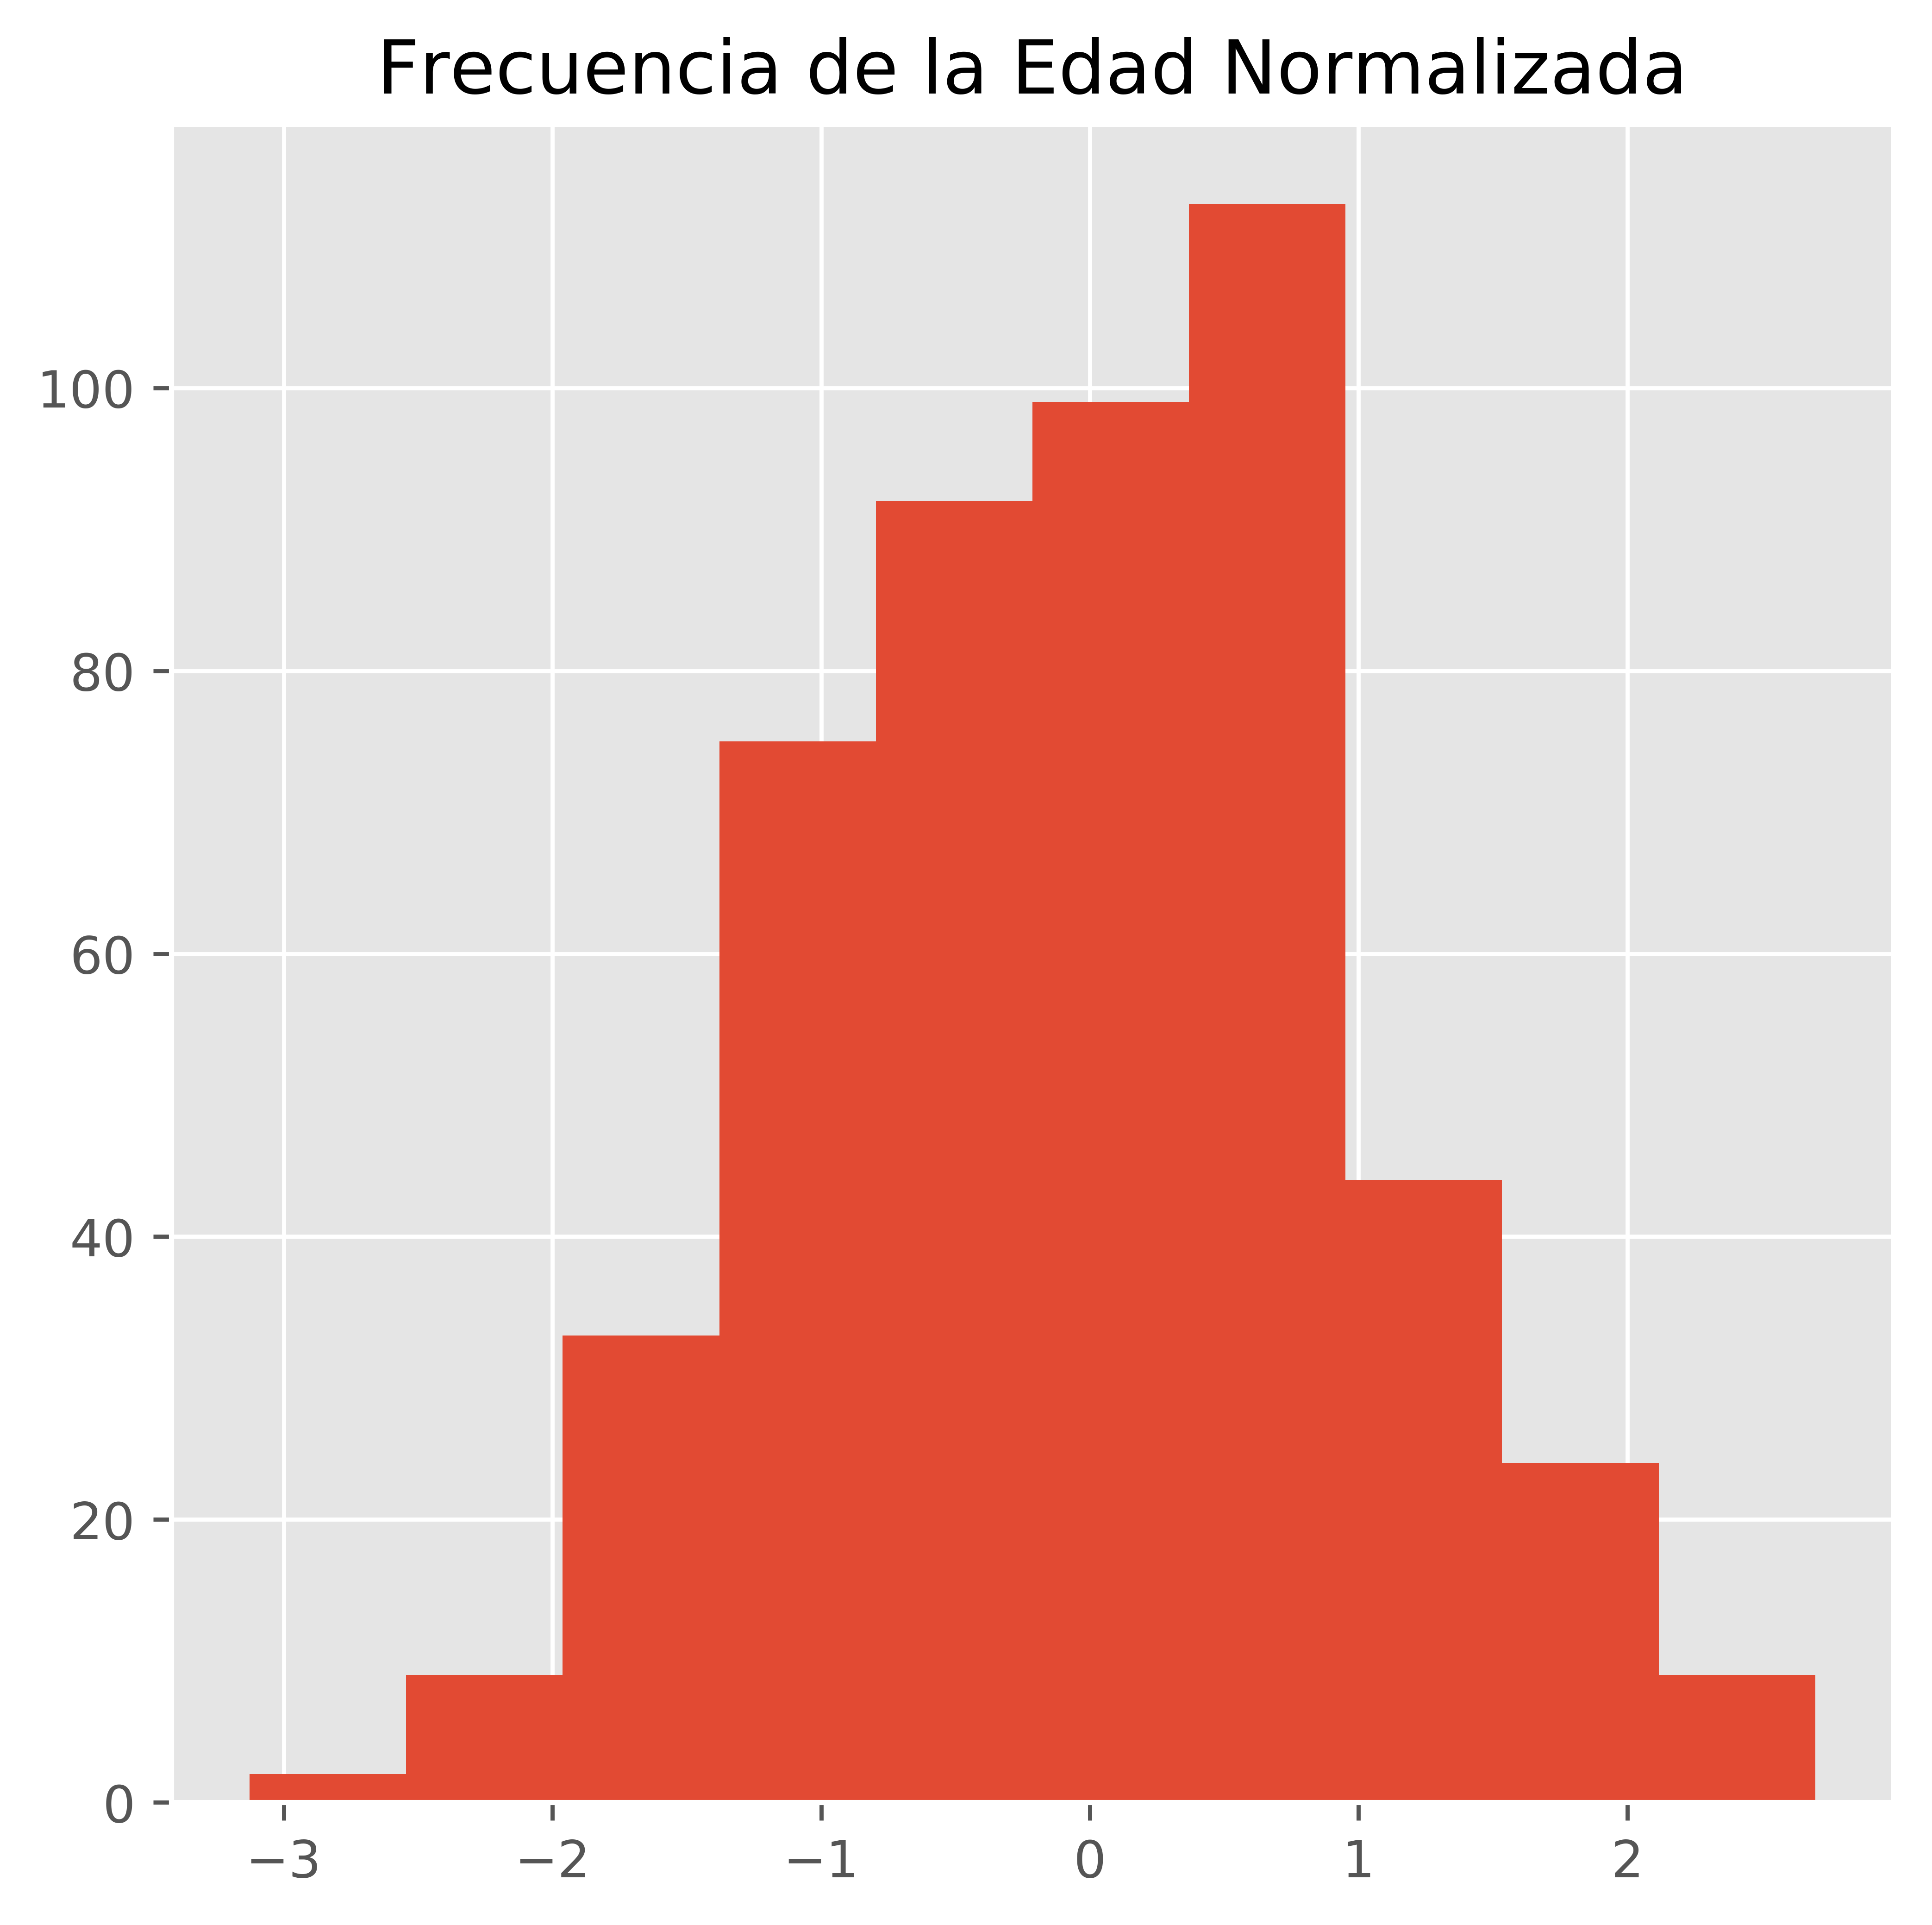

In [44]:
fig, ax= plt.subplots(1,1,figsize=(6,6),dpi=800 )
ax.hist(z_group["Age"])
ax.set_title("Frecuencia de la Edad Normalizada")
plt.show()

### Operaciones diversas muy útiles

In [45]:
double_group.head(1) # Te da uno de cada clase

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Poor,102.166623,78.276595,15.0,13282.0
1,Male,Middle Class,175.137356,106.342419,32.0,16814.0
4,Male,Poor,157.701063,60.104832,41.0,15107.0
5,Female,Middle Class,130.146805,74.283798,38.0,17835.0
8,Male,Rich,204.695548,66.236236,31.0,23161.0
13,Female,Rich,139.310422,74.608201,24.0,19362.0


In [46]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
479,Male,Rich,130.135353,87.540138,18.0,16621.0
489,Female,Rich,198.022411,100.601774,38.0,22834.0
495,Male,Middle Class,160.856232,79.429089,47.0,9957.0
496,Female,Middle Class,201.276853,48.665650,33.0,21300.0
497,Female,Poor,177.411916,35.789449,35.0,16145.0
499,Male,Poor,138.405511,68.847306,43.0,20436.0


In [47]:
double_group.nth(0) # El mismo que arriba(hace 2)

Height      Weight   Age   Income
Gender Economic Status                                       
Female Middle Class     130.146805   74.283798  38.0  17835.0
       Poor             102.166623   78.276595  15.0  13282.0
       Rich             139.310422   74.608201  24.0  19362.0
Male   Middle Class     175.137356  106.342419  32.0  16814.0
       Poor             157.701063   60.104832  41.0  15107.0
       Rich             204.695548   66.236236  31.0  23161.0

In [48]:
data.sort_values(["Age"]).head()
# Para ver la información a partir de una columna seleccionada

,Gender,Economic Status,Height,Weight,Age,Income
218,Female,Poor,185.605446,73.035419,-4.0,18862.0
19,Female,Rich,154.743854,90.249658,-3.0,18157.0
417,Male,Poor,188.584726,65.718630,-3.0,12563.0
315,Male,Middle Class,182.009023,30.569294,-2.0,17311.0
73,Female,Rich,156.531694,87.210398,1.0,18515.0


In [49]:
data_sorted= data.sort_values(["Age","Income"])
data_sorted.head()
# Primero ordena Age y dentro de la misma edad ordena income

,Gender,Economic Status,Height,Weight,Age,Income
218,Female,Poor,185.605446,73.035419,-4.0,18862.0
417,Male,Poor,188.584726,65.718630,-3.0,12563.0
19,Female,Rich,154.743854,90.249658,-3.0,18157.0
315,Male,Middle Class,182.009023,30.569294,-2.0,17311.0
117,Male,Poor,148.599383,71.162527,1.0,14112.0


In [50]:
age_grouped= data_sorted.groupby("Gender")

In [51]:
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
218,Female,Poor,185.605446,73.035419,-4.0,18862.0
417,Male,Poor,188.584726,65.718630,-3.0,12563.0


In [52]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
119,Male,Rich,149.362492,44.621234,59.0,18042.0
358,Female,Poor,162.010673,40.422757,63.0,19573.0


### Conjunto de entramiento y Conjunto de Validación

In [53]:
data= pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [54]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


#### Dividir utilizando la distribución normal

In [55]:
a = np.random.randn(len(data))

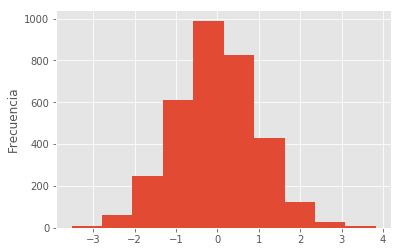

In [56]:
fig,ax=plt.subplots(1,1)
ax.hist(a)
ax.set_ylabel("Frecuencia")
plt.show()

In [57]:
# Entrenamiento 75% y testing 25%
check = (a<0.75)
check

array([ True,  True, False, ...,  True,  True,  True])

In [58]:
true=  check.sum()
true

2610

In [59]:
false = len(check)-true
false

723

In [60]:
array = [true,false]

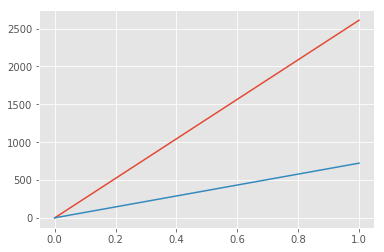

In [61]:
fig,ax= plt.subplots(1,1)
ax.plot(((0,1),array))
plt.show()

In [62]:
training= data[check]
training.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.


In [63]:
test = data[~check]
test.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,...,83,19.42,208.8,111,9.40,12.7,6,3.43,4,False.
14,IA,62,415,366-9238,no,no,0,120.7,70,20.52,...,76,26.11,203.0,99,9.14,13.1,6,3.54,4,False.


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
train,test=train_test_split(data,test_size=0.25)

In [66]:
len(train), len(test)

(2499, 834)

### Usando la función de shuffle

In [67]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [68]:
from sklearn.utils import shuffle

In [69]:
data= shuffle(data)

In [70]:
cut_id = int(np.ceil(0.75*len(data)))

In [71]:
train_data = data[:cut_id]
test_data = data[cut_id:]

In [72]:
len(train)

2499

In [73]:
len(test_data)

833